# Telecom Churn Analysis

Dataset Info: Sample dataset containing telecom user data and showing customers left last month

In [3]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Load the data file

In [4]:
teleco_base_data =pd.read_csv("D:\DataScience\Machine learning\Customer churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

Look at the top 5 records of data

In [5]:
teleco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
teleco_base_data.shape

(7043, 21)

 7043 --> rows/instances
 21 --> features/columns

In [7]:
teleco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#Chekcing the data type of all column
teleco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Check the discriptive statistics of numeric variables
teleco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Seniorcitizen is actually categorical hence 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months

Average monthly charges are USD 64.76 where 25% customers pay more than USD 89.85

Text(0.5, 1.0, 'Count of TARGET variable per category')

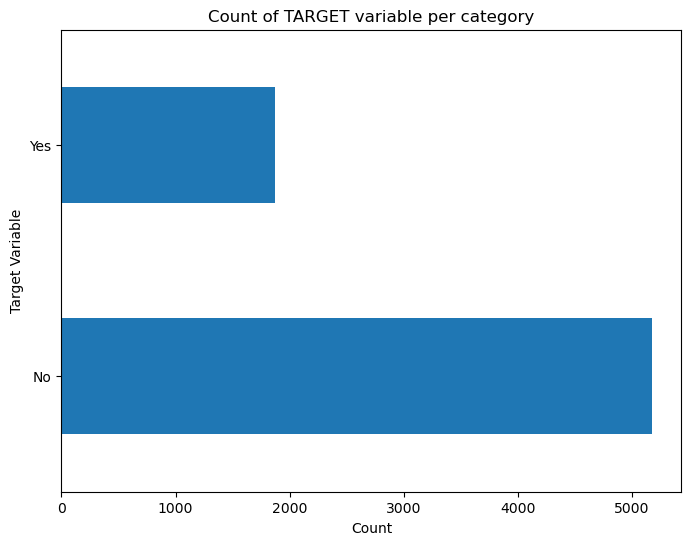

In [10]:
#teleco_base_data['Churn'].value_counts().plot(kind='barh',figsize(8,6) )
teleco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET variable per category")

In [11]:
100*teleco_base_data['Churn'].value_counts()/len(teleco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [12]:
teleco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Data is highly imbalaced ratio is 73:27
so we analyse the data with other features while taking the target values seperately to get some insights

In [13]:
# Consise summary of the data frame, as we have too many columns we are using verbose=True
teleco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


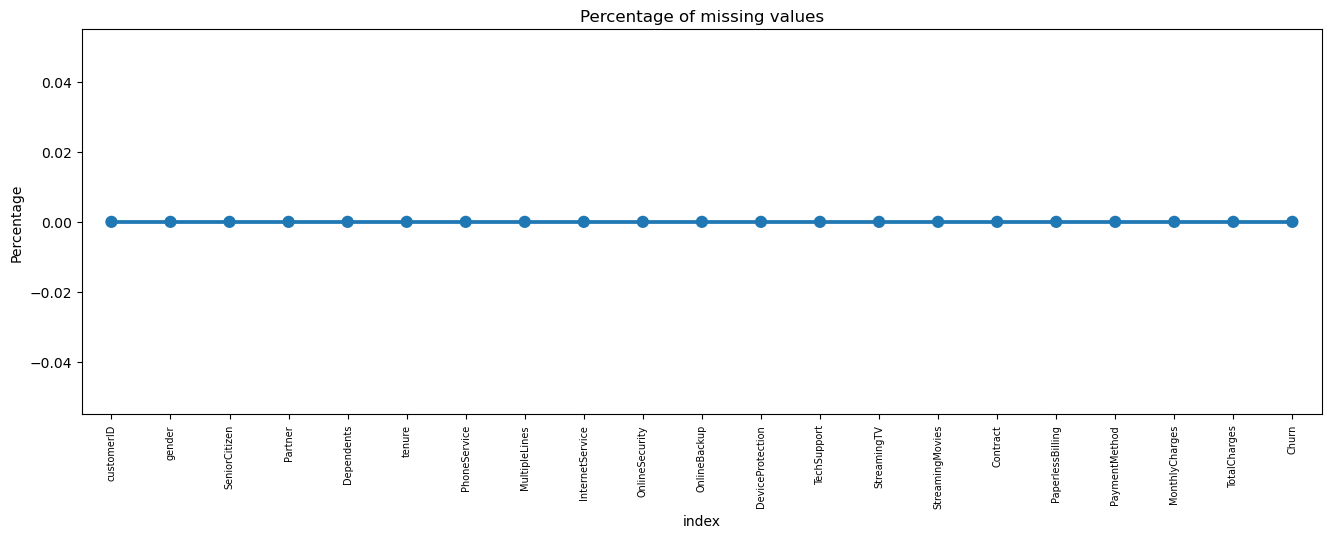

In [14]:
missing=pd.DataFrame((teleco_base_data.isnull().sum()*100)/teleco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

# Missing Data - Initial Intuition

Here we don't have any missing data

General Thumb Rules:
For feature with less misssing value:  Can use regression to predict the missing values or fill with the mean of the value present, depending on the feature.
For feature with very high number of missing values: It is better to drop those columns as they give very less insights on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Data Cleaning

 1. Create a copy of base data for data manipulation and processing

In [15]:
teleco_data=teleco_base_data.copy()

In [ ]:
2. Total charges should be numeric. Lets convert it to numerical data type

In [16]:
teleco_data.TotalCharges=pd.to_numeric(teleco_data.TotalCharges,errors='coerce')
teleco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [18]:
teleco_data.loc[teleco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [19]:
#Removing misssing values
teleco_data.dropna(how='any',inplace=True)

In [20]:
teleco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

5. Divide customer into bins based on tenure.e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure 
    between 1 to 2 Yrs, tenure group of 13-24; so on...

In [22]:
# Get the max tenure
print(teleco_data['tenure'].max())

72


In [23]:
#Group the tenure in group of 12 months

labels=[" {0} - {1} ".format(i, i+11 ) for  i  in  range(1, 72, 12)]

teleco_data['tenure_group']= pd.cut(teleco_data.tenure , range(1,80,12) , right=False , labels=labels)

range(1,72,12) --> Create a range of numbers staring from 1 to 71(since 27 is exclueded), with a step of 12.
So, it generates the numbers: 1, 13, 25, 37, 49, 61.
    
{0} -{1}.format(i,i+11) --> For each number i in the range, this creates a string in te format "i -(i+11)"
For ex. if i is 1 it creates 1-12, if i is 13 it creates 13-24

teleco_data['tenure_group']= pd.cut(teleco_data.tenure , range(1,80,12) , right=False , labels=labels) -->

This line of code uses the pd.cut function from the pandas library to categorize the tenure values in the 
telco_data DataFrame into bins based on the labels created earlier. Here's how it works:

telco_data.tenure refers to the tenure column in the telco_data DataFrame.

range(1, 80, 12) creates a range of numbers from 1 to 79 with a step of 12. This range is used to define the bin 
edges for categorizing the tenure values. So, it generates the numbers: 1, 13, 25, 37, 49, 61, 73.
These numbers define the edges of the bins: [1-13), [13-25), [25-37), [37-49), [49-61), [61-73).
                                                                                         
right=False indicates that the bins are right-open (left-closed). This means that the interval includes 
the left endpoint but excludes the right endpoint. For example, [1, 13) includes 1 but not 13.
                                                                 
labels=labels assigns the corresponding label from the labels list to each bin.


In [24]:
teleco_data['tenure_group'].value_counts()

tenure_group
 1 - 12      2175
 61 - 72     1407
 13 - 24     1024
 25 - 36      832
 49 - 60      832
 37 - 48      762
Name: count, dtype: int64

6. Remove columns not required for processing

In [25]:
#Drop column customerId and tenure 
teleco_data.drop(columns=['customerID','tenure'], axis=1, inplace=True)
teleco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Data Exploration

1. Plot distribution of individual prdictors by churn

# Univariate Analysis

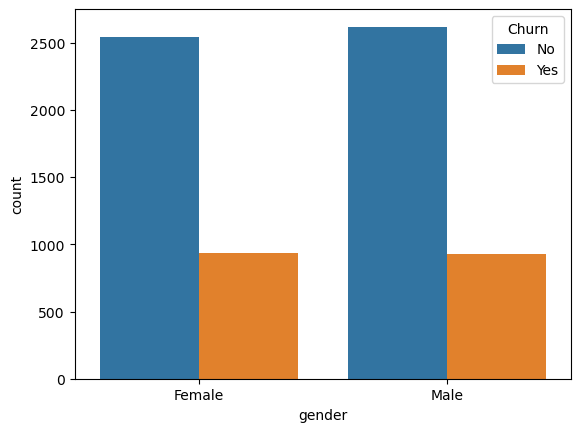

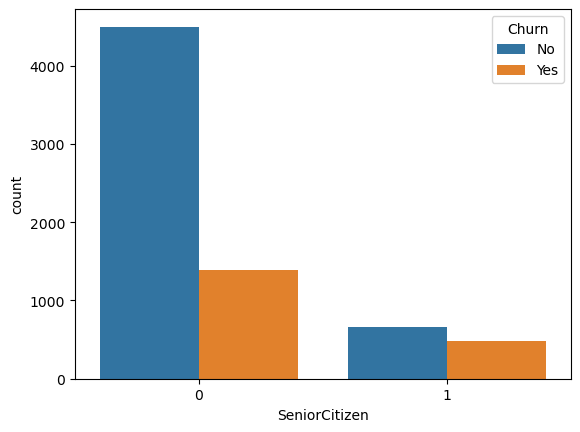

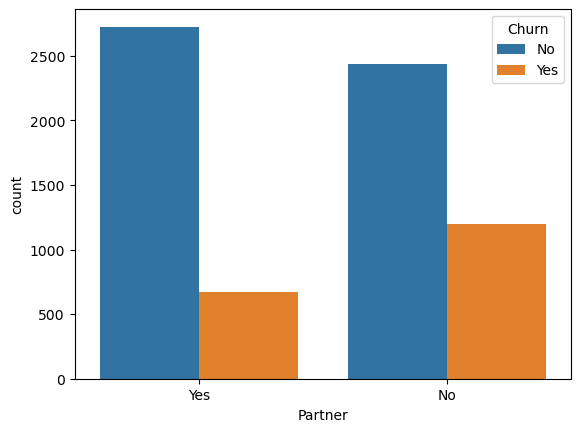

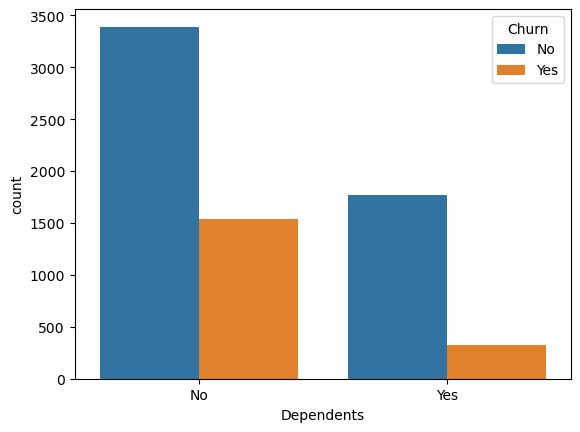

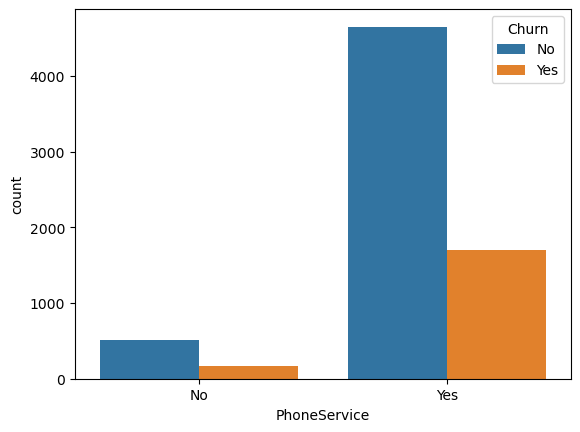

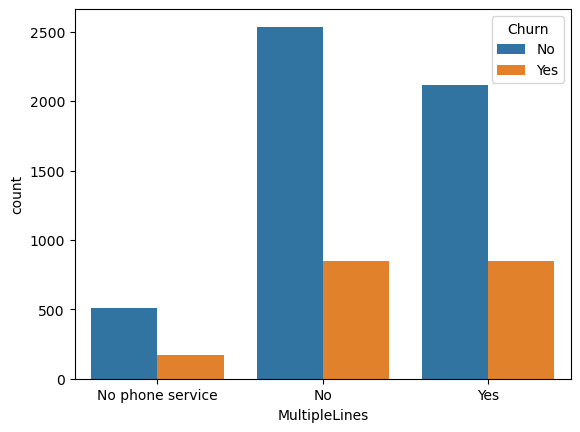

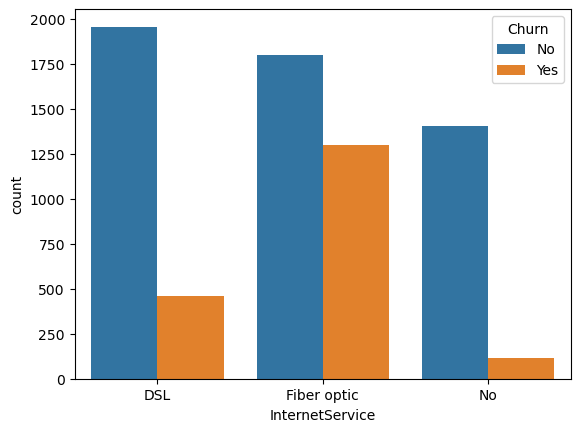

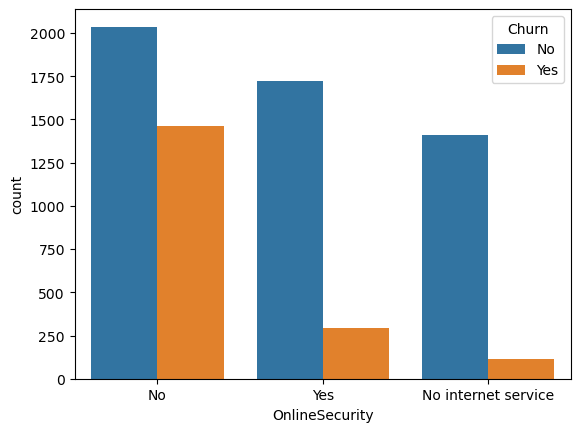

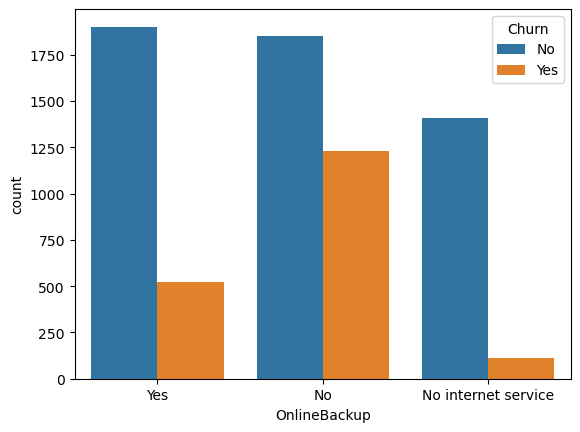

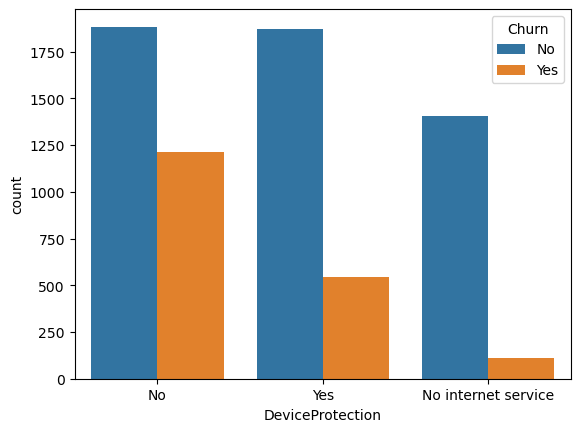

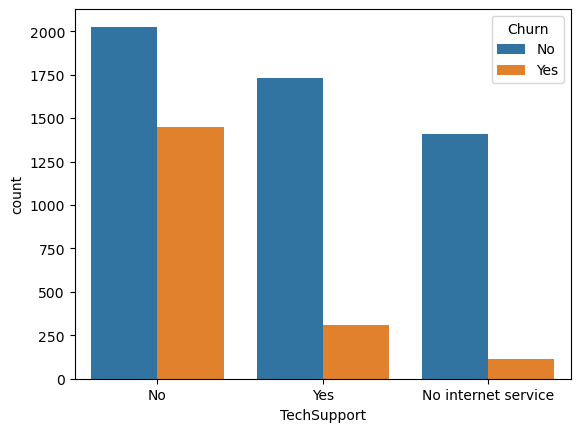

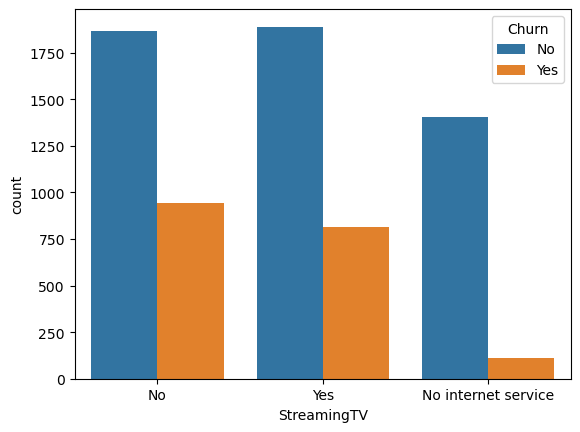

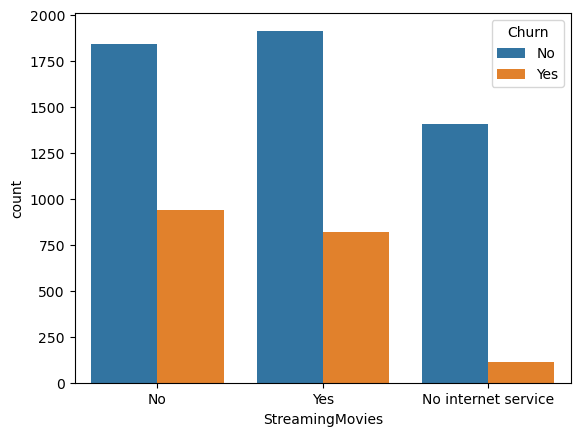

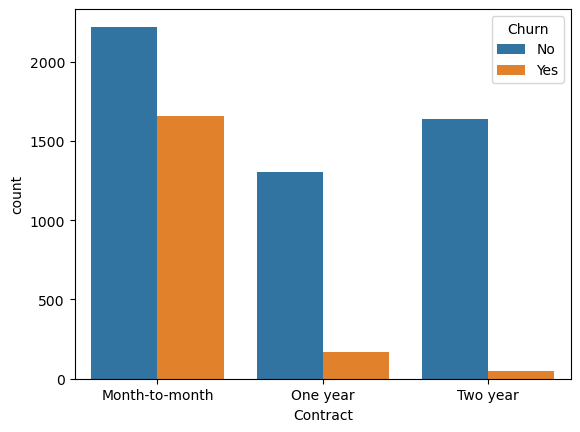

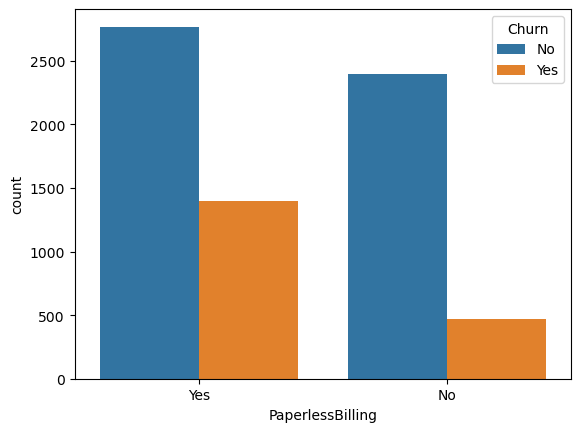

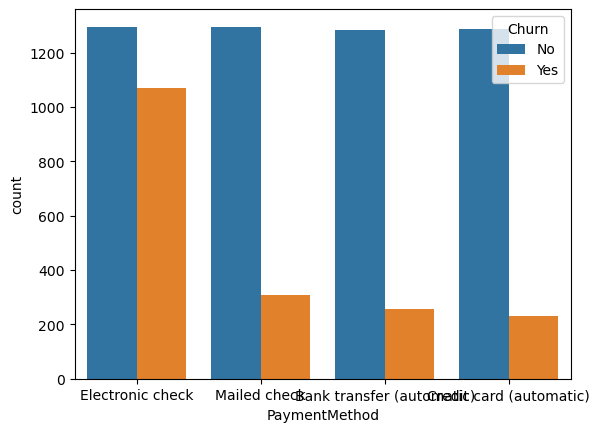

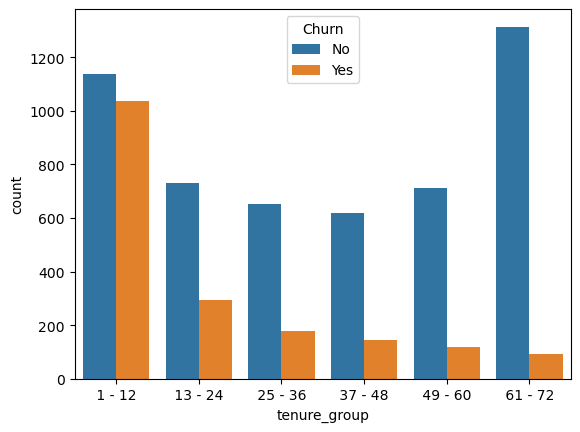

In [26]:
for i, predictor in enumerate(teleco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(x=predictor, data=teleco_data, hue='Churn')

telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])
This creates a new table that has all the columns from the original telco_data table except for 'Churn', 'TotalCharges', 
and 'MonthlyCharges'.

for i, predictor in enumerate(...):
enumerate(...) goes through each column in this new table one by one.

i is a number that increases by 1 each time (starting from 0), helping us keep track of which column we are on.

predictor is the name of the current column we're looking at.

What It Does
It goes through every column in the telco_data table, except 'Churn', 'TotalCharges', and 'MonthlyCharges'.
It gives you both the column name (predictor) and a number (i) that tells you which column you're on.

plt.figure(i) creates a new figure for each predictor, with the figure number set to i. 
This ensures that each plot is drawn in a separate figure.

sns.countplot(data=telco_data, x=predictor, hue='Churn')
sns.countplot() is a function from the seaborn library that creates a count plot, which shows the counts of 
observations in each categorical bin using bars.

data=telco_data specifies the DataFrame to be used for the plot.
x=predictor sets the column to be used on the x-axis. This will be one of the predictors in each iteration.

hue='Churn' adds another dimension to the plot by grouping the data based on the 'Churn' column. 
This will color the bars differently depending on whether the 'Churn' value is true or false.

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [27]:
teleco_data['Churn']=np.where(teleco_data['Churn']=='Yes',1,0)

Purpose: Converts the 'Churn' column values from 'Yes' and 'No' to 1 and 0, respectively.

How it works:

np.where(condition, value_if_true, value_if_false) is a function from the NumPy library.

teleco_data['Churn'] == 'Yes' checks if each value in the 'Churn' column is 'Yes'.
If the value is 'Yes', it replaces it with 1.
If the value is 'No', it replaces it with 0.

In [28]:
teleco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [29]:
teleco_data_dummies=pd.get_dummies(teleco_data)
teleco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_ 1 - 12,tenure_group_ 13 - 24,tenure_group_ 25 - 36,tenure_group_ 37 - 48,tenure_group_ 49 - 60,tenure_group_ 61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Purpose: Converts categorical variables in the telco_data DataFrame into numerical values.
    
How it works:
    
pd.get_dummies(telco_data) is a function from the pandas library.

It transforms categorical columns (columns with text or categories) into multiple columns of 0s and 1s (dummy variables).

For each category in a categorical column, it creates a new column. If the original column had three categories 
'A', 'B', and 'C', it will create three new columns with values 0 or 1 indicating the presence of each category.

In [ ]:
**9. ** Relationship between Monthly Charges and Total Charges

C:\Users\Saurabh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


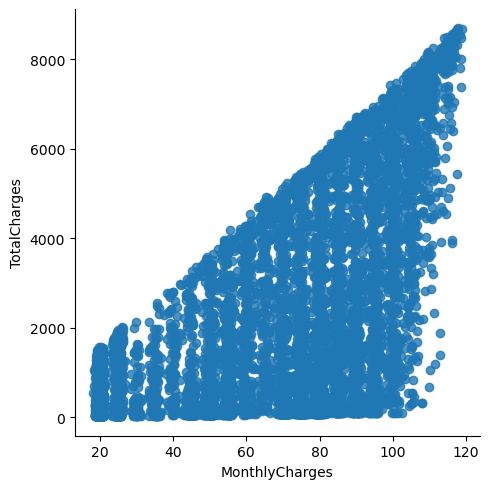

In [34]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=teleco_data_dummies, fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

When fit_reg=False is used, it means that the plot will show the data points without a regression line.
it_reg=False: Tells sns.lmplot not to draw a regression line on the plot

**10. ** Churn by Monthly Charges and Total Charges

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_18512\682279328.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth= sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']==0)],
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_18512\682279328.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth=sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']==1)],


Text(0.5, 1.0, 'Monthly charges by churn')

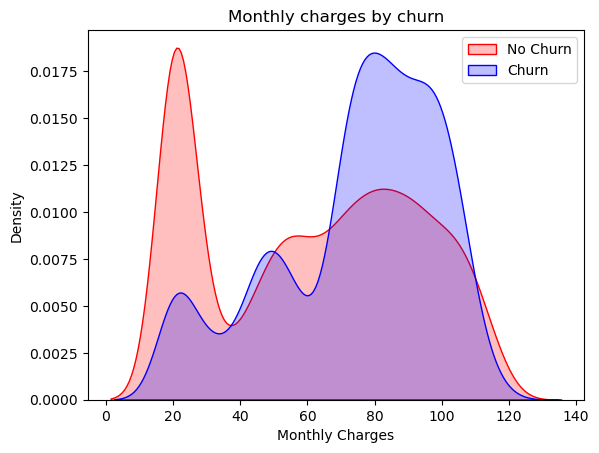

In [35]:
Mth= sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']==0)], 
                color='red', shade=True)
#Plots the Kernel Density Estimate (KDE) for MonthlyCharges where Churn is 0 (no churn).
#The plot is shaded and colored red.

Mth=sns.kdeplot(teleco_data_dummies.MonthlyCharges[(teleco_data_dummies['Churn']==1)],
               color='blue', ax=Mth , shade=True)
#ax=Mth means this plot will be drawn on the same figure (axis) as the previous plot stored in Mth.

Mth.legend(['No Churn','Churn'],loc='upper right')
#Adds a legend to the plot with labels "No Churn" (for red) and "Churn" (for blue), located in the upper right corner.

Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Monthly charges by churn")

**Insight: Churn is high when Monthly Charges ar high

This code creates a KDE plot to visualize the distribution of MonthlyCharges for customers who have churned and those who have not. The plot uses different colors to distinguish between the two groups, adds a legend, and labels the axes and the plot.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_18512\2112669278.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot=sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']==0)],
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_18512\2112669278.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot=sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']==1)],


Text(0.5, 1.0, 'Total charges by churn')

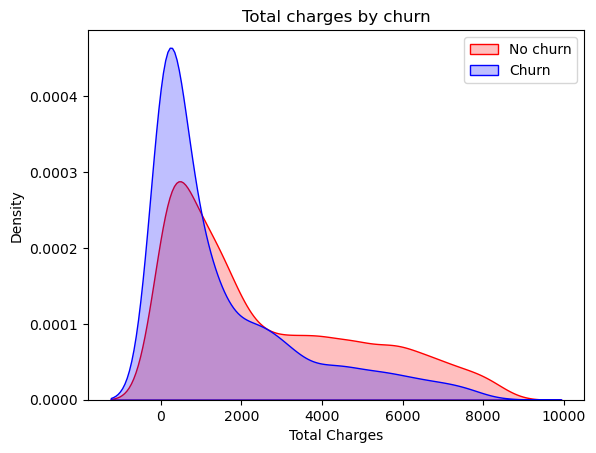

In [39]:
Tot=sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']==0)],
               color='red',shade=True)
Tot=sns.kdeplot(teleco_data_dummies.TotalCharges[(teleco_data_dummies['Churn']==1)],
               color='blue', ax=Tot , shade=True )
Tot.legend(['No churn', 'Churn'], loc='upper right')
Tot.set_ylabel("Density")
Tot.set_xlabel("Total Charges")
Tot.set_title("Total charges by churn")

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

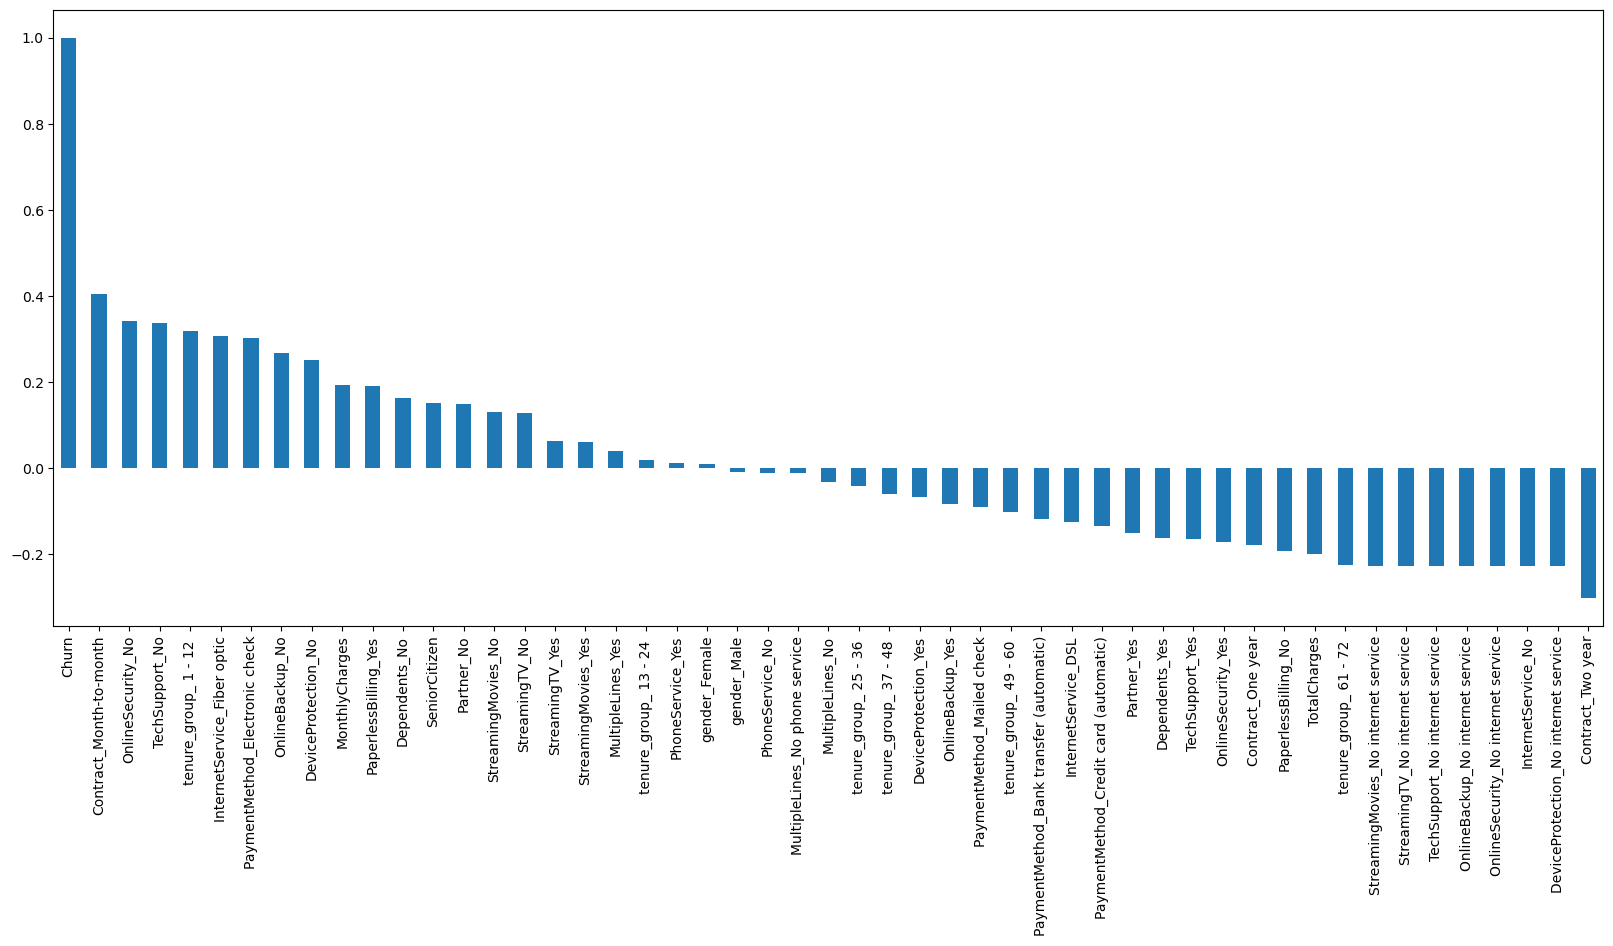

In [40]:
plt.figure(figsize=(20,8))
teleco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Derived Insight: **

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

<Axes: >

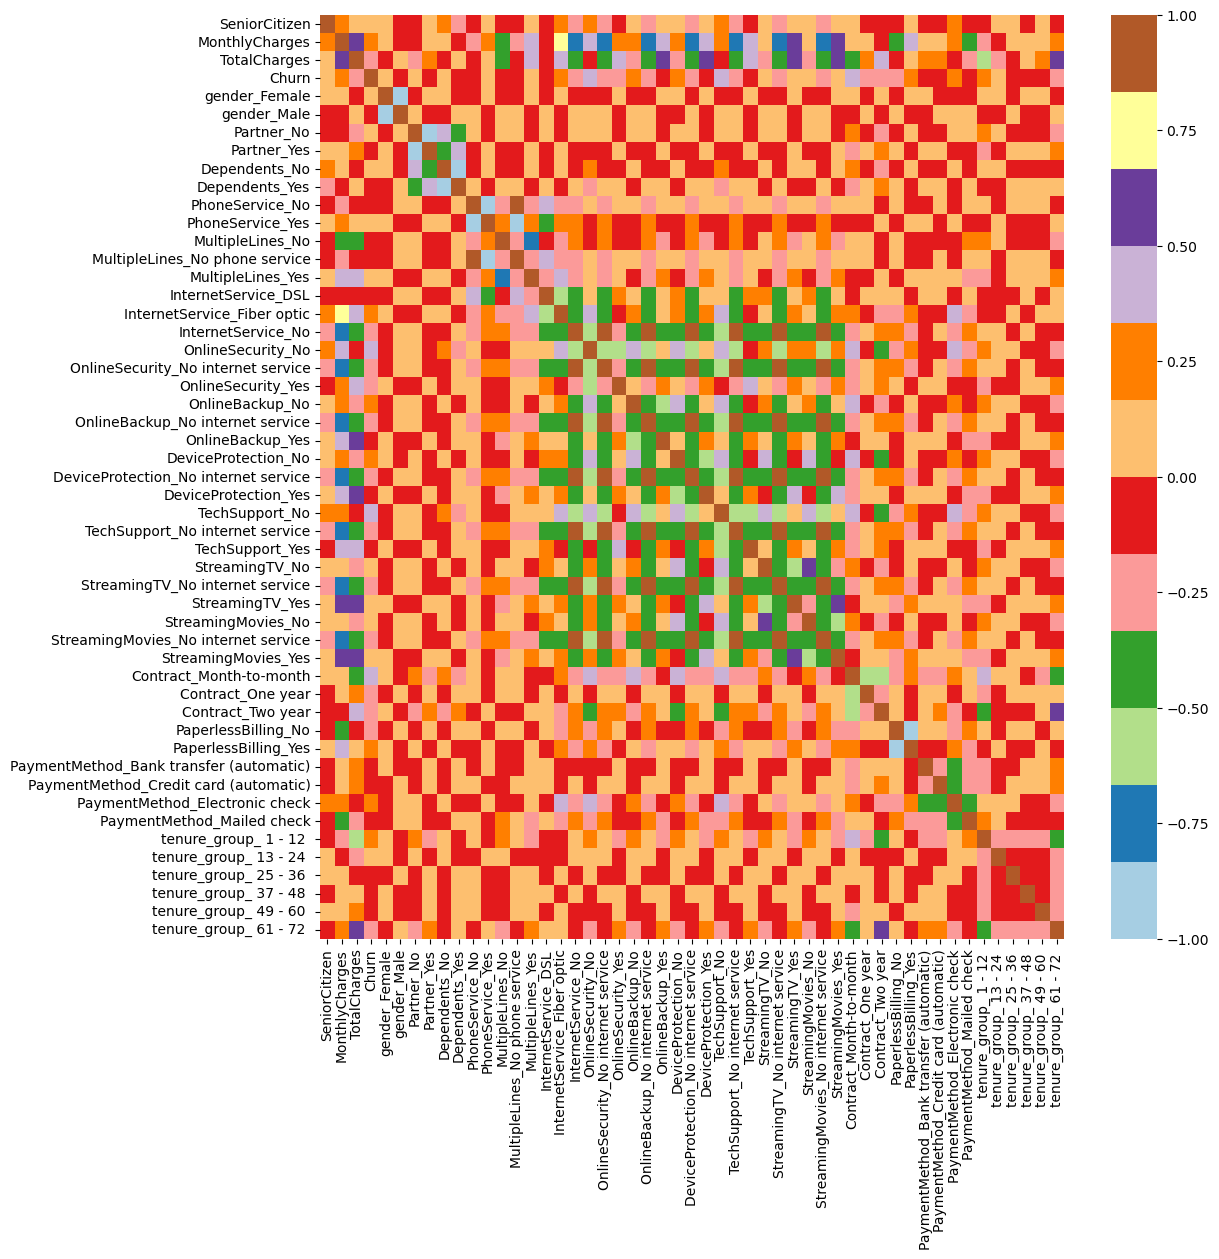

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(teleco_data_dummies.corr() , cmap='Paired')

# Bivariate Analysis

In [46]:
new_df1_target0=teleco_data.loc[teleco_data['Churn']==0] #contains data for customers who did not churn.
new_df1_target1=teleco_data.loc[teleco_data['Churn']==1] # contains data for customers who did churn.

In [66]:
def uniplot(df, col, title, hue=None):
    
    sns.set_style("whitegrid") # Sets the background style to white with grid lines
    sns.set_context("talk")    # Sets the context to 'talk' for larger plot elements
    plt.rcParams["axes.labelsize"] = 20 # Sets the font size for axis labels
    plt.rcParams["axes.titlesize"] = 22 # Sets the font size for plot titles
    plt.rcParams["axes.titlepad"] = 30  # Sets the padding around the plot title
    
     # Create a series from hue data
    temp=pd.Series(data=hue) 
    #converts the hue data into a pandas Series temp, making it easier to work with and manipulate within the context 
    #of pandas operations or plotting functions.
    
    # Create a figure and axis
    fig,x=plt.subplots()
    #This line of code creates a new figure (canvas) and one subplot (or axis) within that figure.
    
    # Calculate the width of the figure based on unique values in the column and hue
    width=len(df[col].unique()) + 7 + 4*len(temp.unique())
    
    fig.set_size_inches(width,8)  # Set the figure size
    
    plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
    
    plt.yscale('log') # Set y-axis scale to logarithmic
    
    plt.title(title)
    
    # Create a count plot using seaborn
    ax=sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.show() # Display the plot

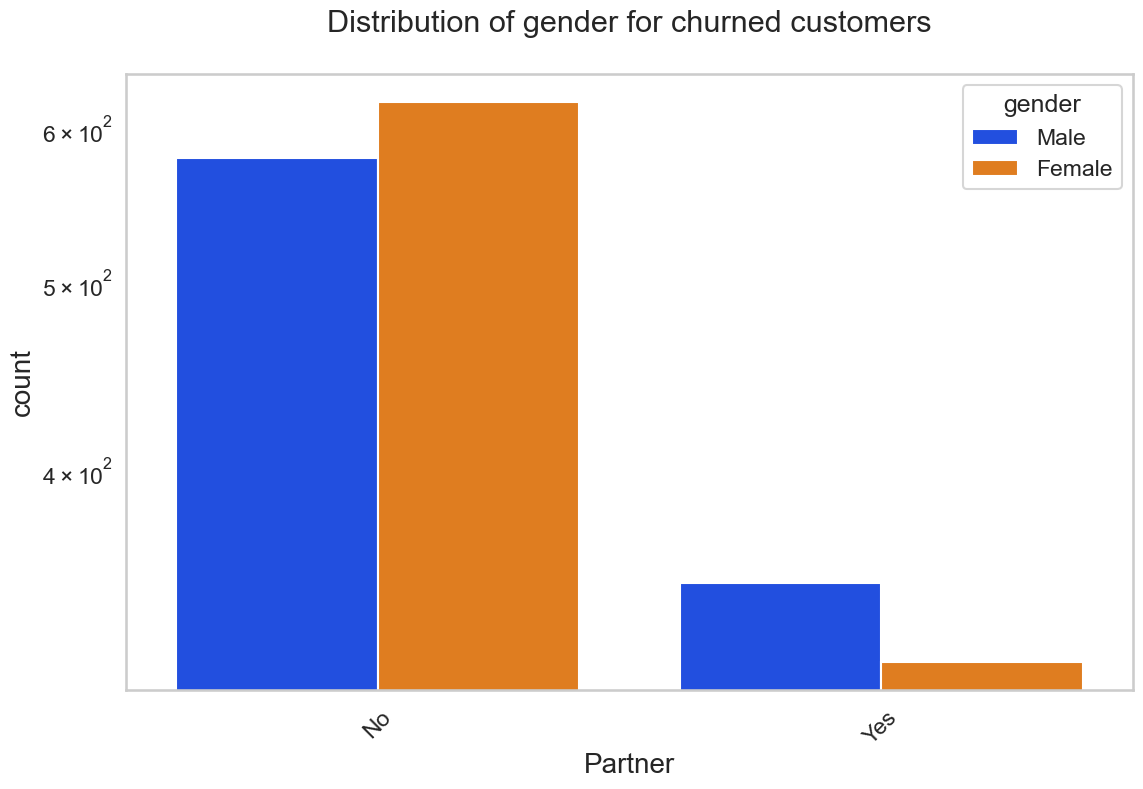

In [67]:
uniplot(new_df1_target1, col='Partner',title="Distribution of gender for churned customers",hue='gender')

pd.Series(): This is a pandas function used to create a Series, which is a one-dimensional labeled array capable 
of holding any data type (integers, strings, floating-point numbers, Python objects, etc.).

data=hue: Assigns the values from hue to the Series temp. Depending on what hue contains:
        
If hue is a list, array, or another Series, temp will be created with these values.
If hue is None, temp will be an empty Series (pd.Series([])).


width:
This line of code dynamically calculates the width of a plot figure based on:

The number of unique values in a specified column (col) of a DataFrame (df).
Additional fixed padding (7) for spacing around the plot.
Extra width (4 * len(temp.unique())) based on the number of unique values in a series (temp) derived from 
the hue parameter, which could contain categorical data.

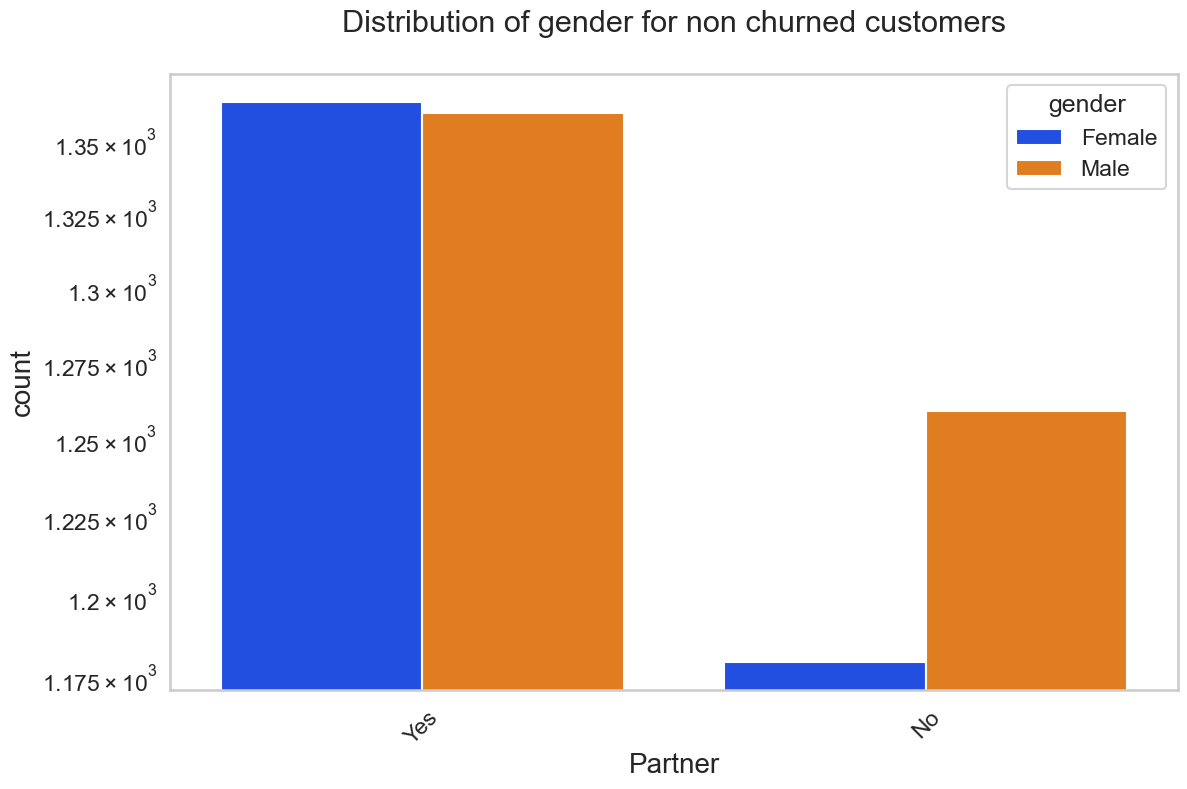

In [68]:
uniplot(new_df1_target0, col='Partner', title='Distribution of gender for non churned customers',hue='gender')

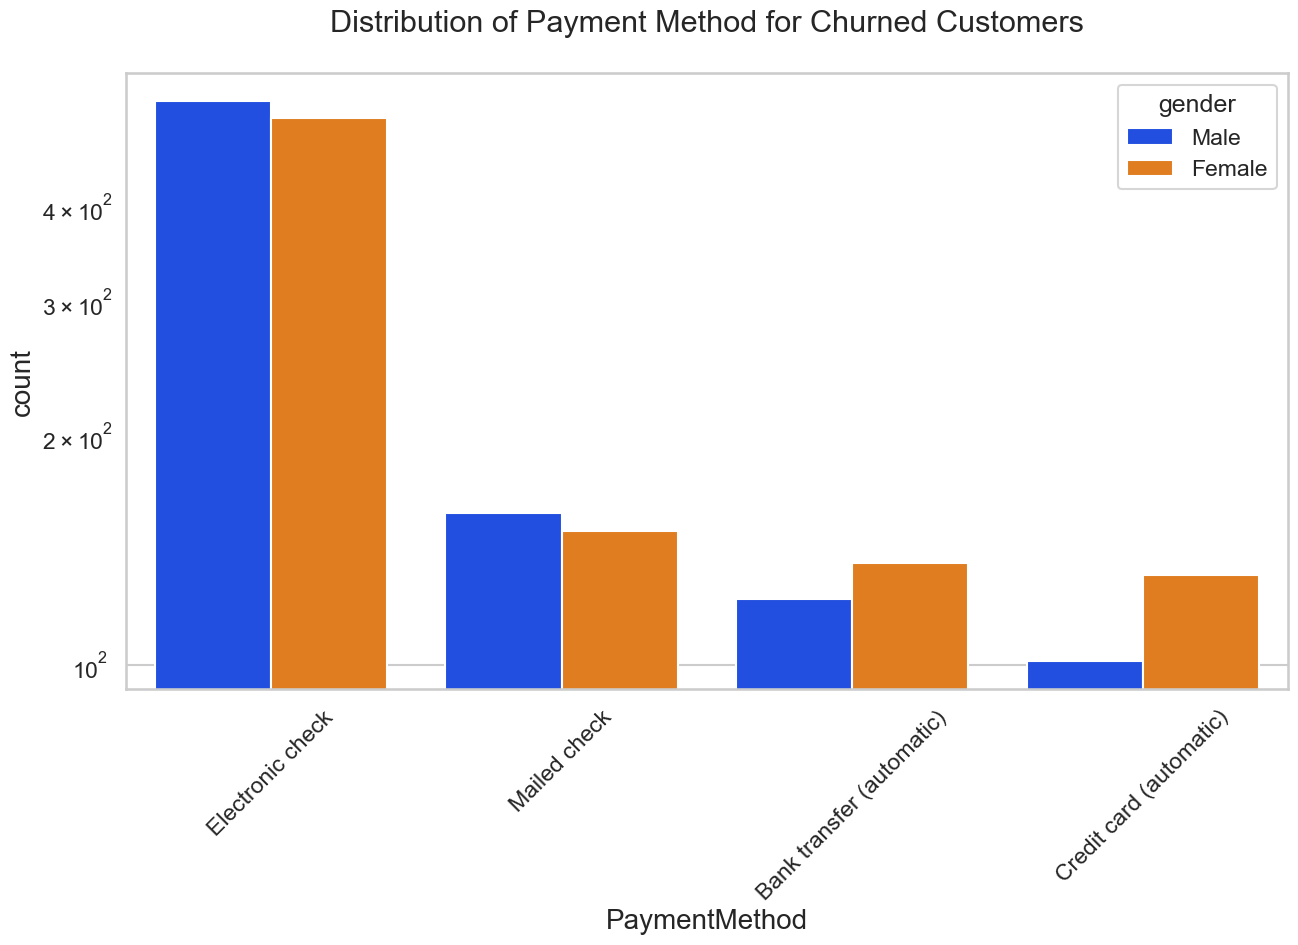

In [69]:
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers', hue='gender')

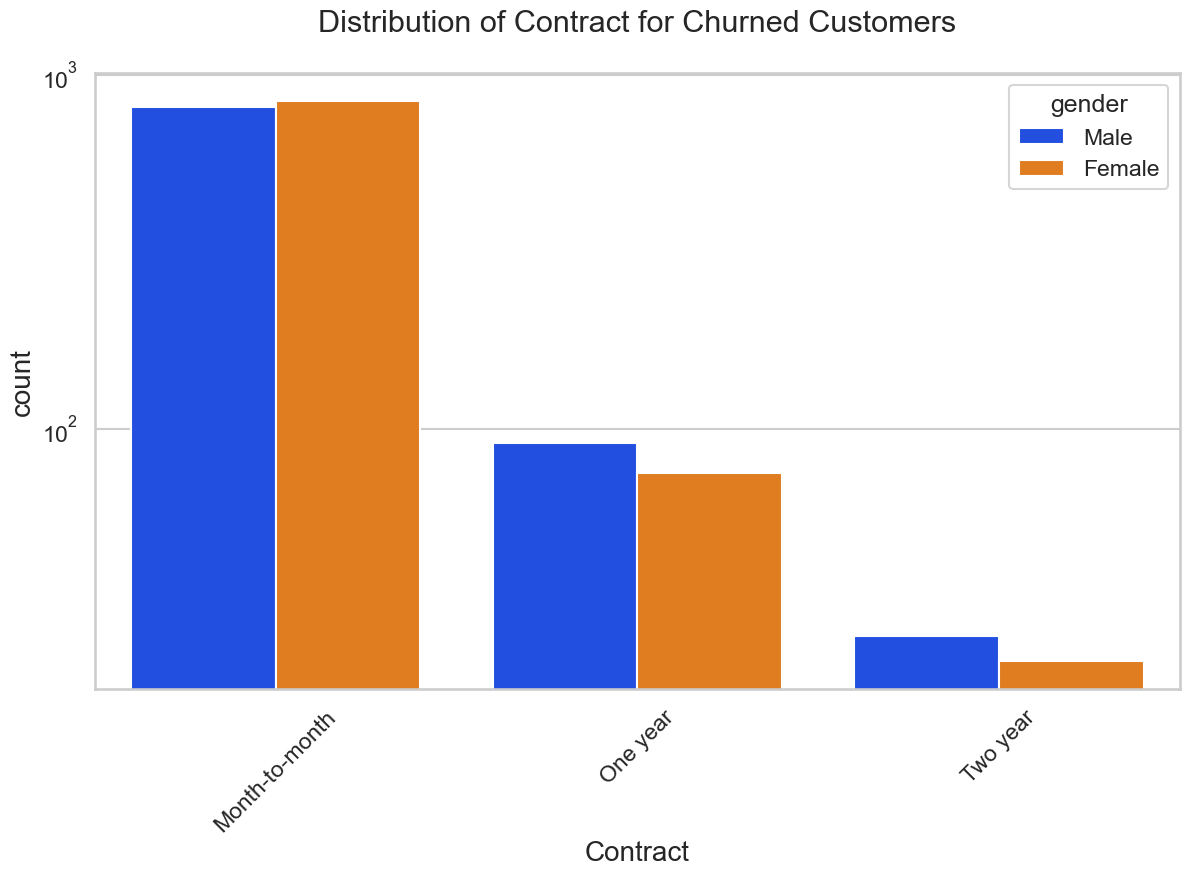

In [70]:
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

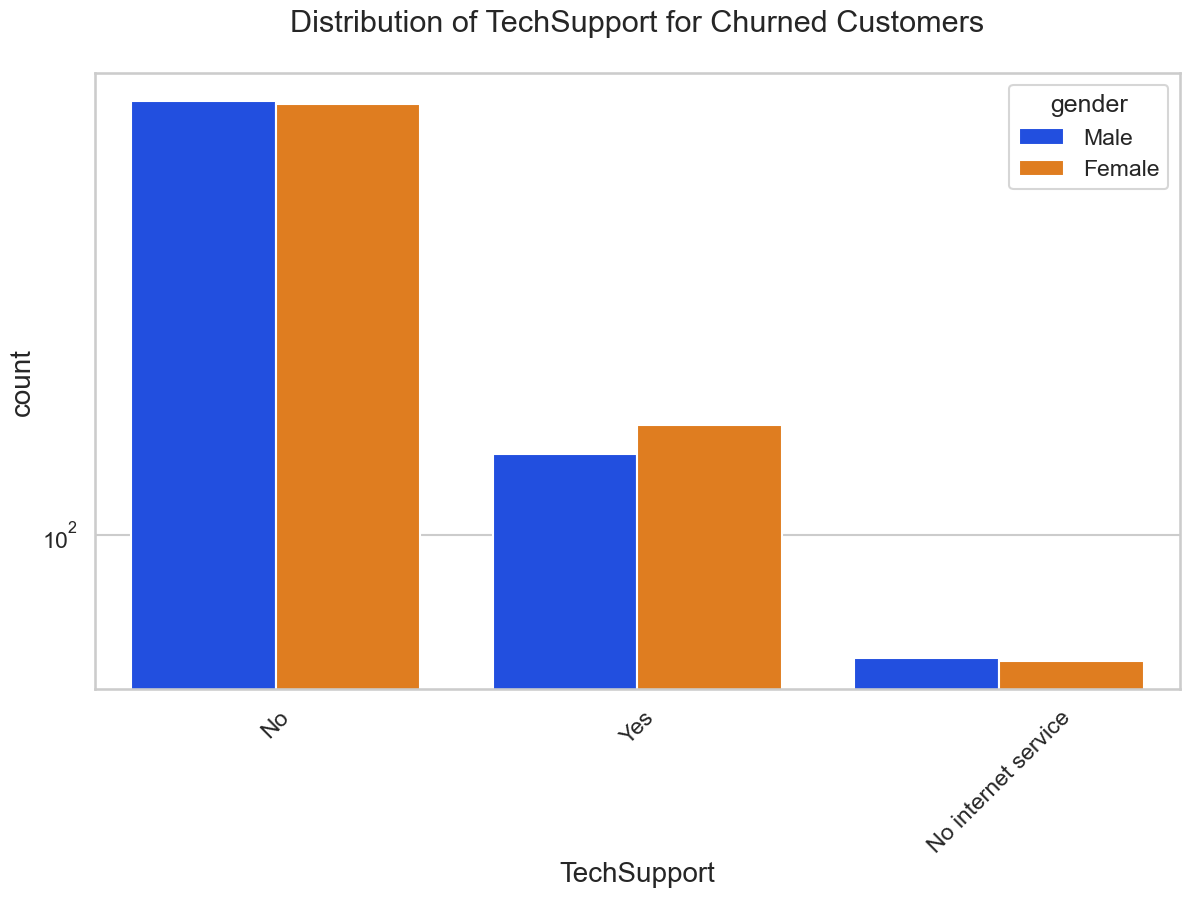

In [71]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

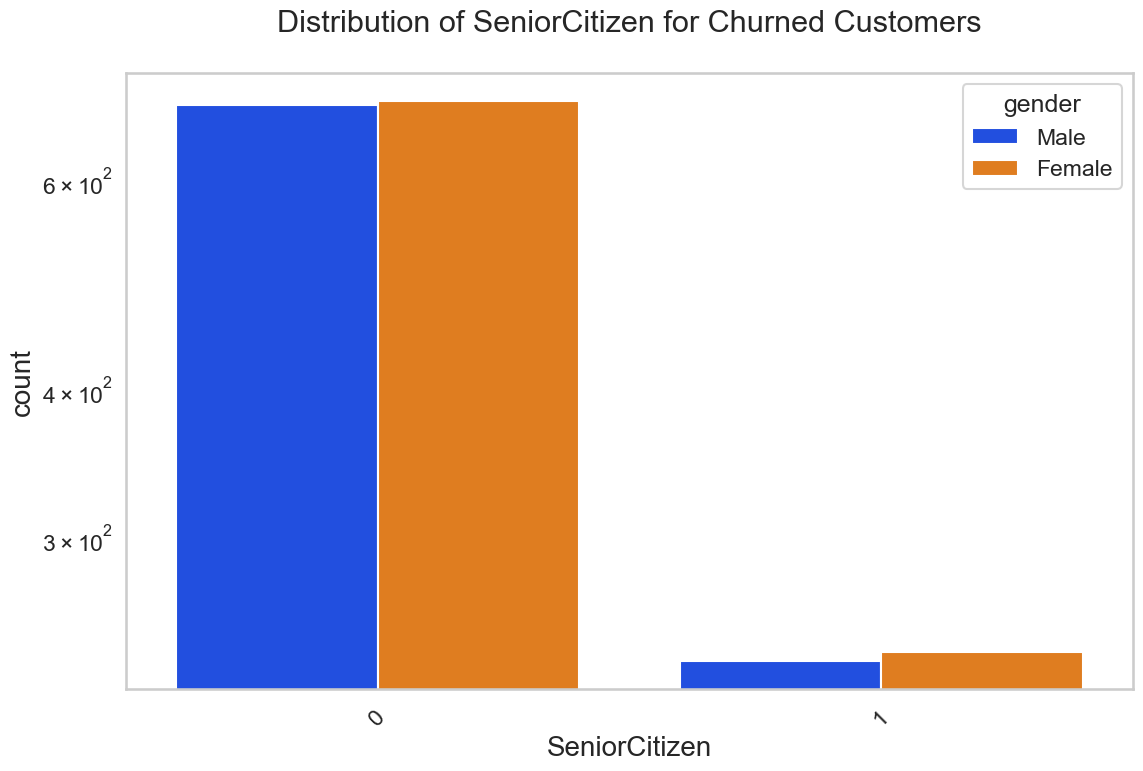

In [72]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

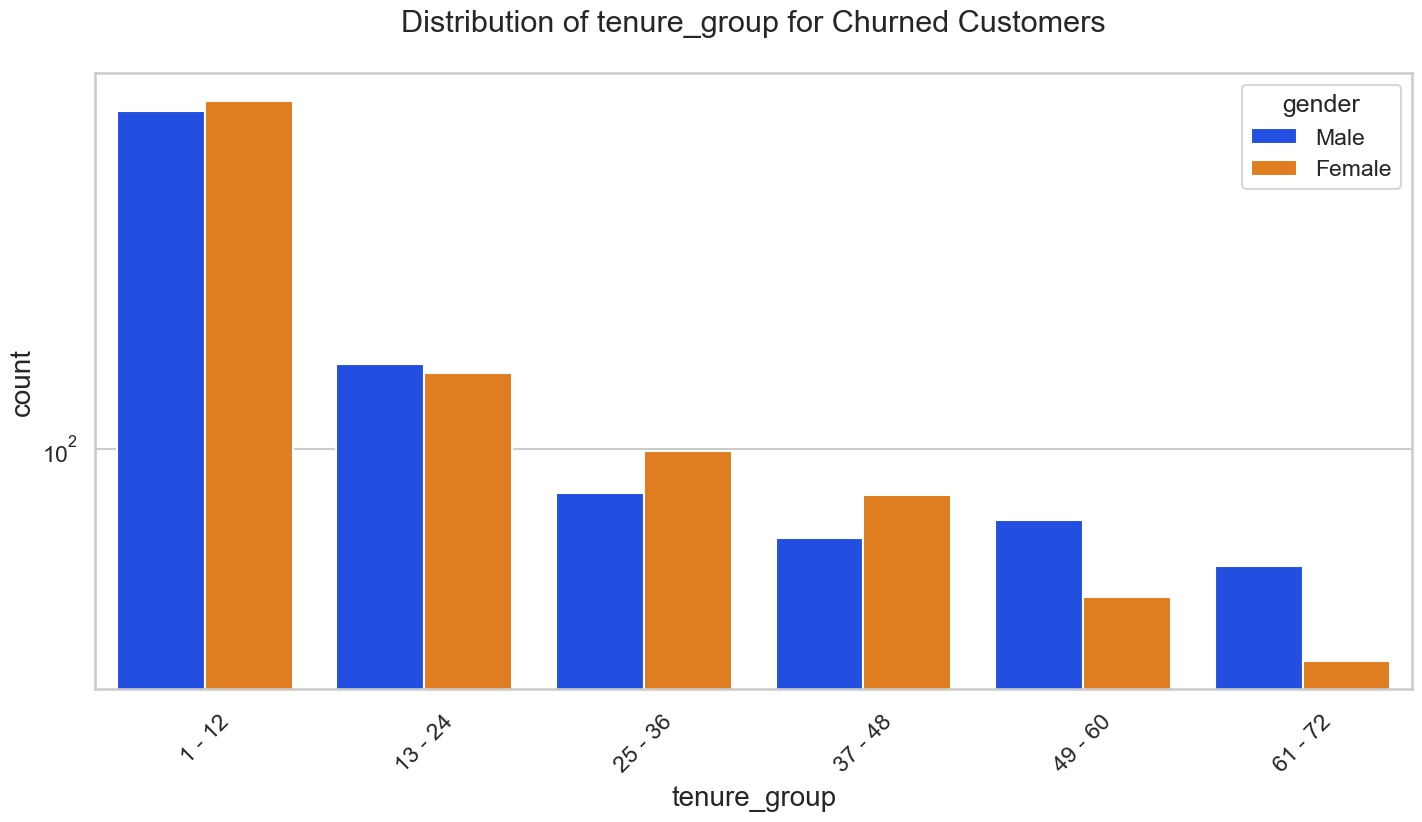

In [73]:
uniplot(new_df1_target1,col='tenure_group',title='Distribution of tenure_group for Churned Customers',hue='gender')

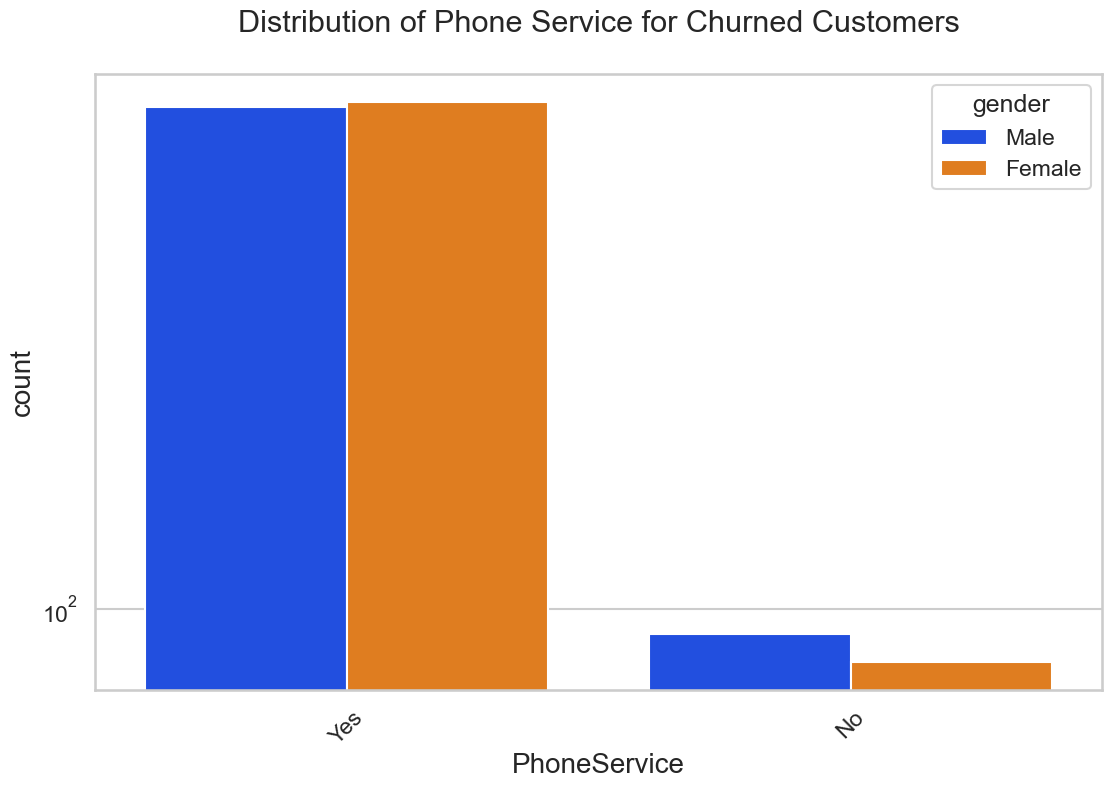

In [74]:
uniplot(new_df1_target1,col='PhoneService',title='Distribution of Phone Service for Churned Customers',hue='gender')

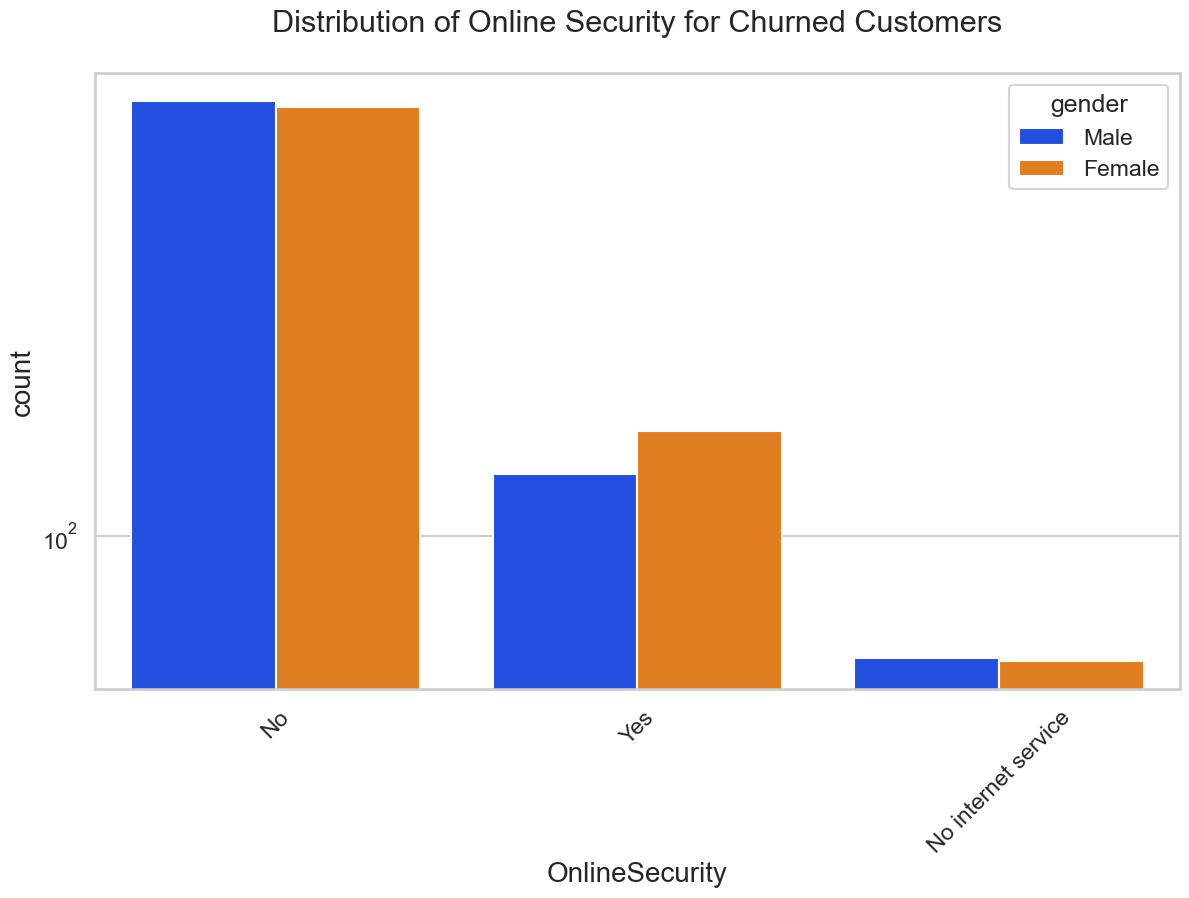

In [75]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Online Security for Churned Customers',hue='gender')

# CONCLUSION
These are some of the quick insights from this:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners

In [79]:
teleco_data_dummies.to_csv("D:\\DataScience\\Machine learning\\Customer churn\\tel_Churn.csv")